# Task 4 - Exploratory Data Analysis - Terrorism

Name - Sayed Suhaib Iliyas

Position - Data Science and Business Analytics Intern @ The Sparks Foundation

Dataset - : https://bit.ly/34SRn3b

Libraries Importing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data importing

In [2]:
data = pd.read_csv("D:\\Data Science Project\\terrorism/globalterrorismdb_0718dist.csv")

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

selecting relevent columns

In [5]:
data = data[['iyear','imonth','iday','country_txt','region_txt','provstate','city','location','attacktype1_txt','targtype1_txt','target1','gname','weaptype1_txt','weapsubtype1_txt','nkill','nwound']]

In [6]:
data.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,location,attacktype1_txt,targtype1_txt,target1,gname,weaptype1_txt,weapsubtype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,Unknown,NaN,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,Unknown,NaN,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,Assassination,Journalists & Media,Employee,Unknown,Unknown,NaN,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,Explosives,Unknown Explosive Type,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,Incendiary,NaN,NaN,NaN


Renaming selected columns

In [7]:
data.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'country','region_txt':'region','provstate':'state',
                       'city':'city','attacktype1_txt':'attack_type','targtype1_txt':'target_type','target1':'target','nkill':'killed',
                       'nwound':'wounded','gname':'group',
                       'weaptype1_txt':'weapon_type','weapsubtype1_txt':'weapon_subtype'},inplace=True)

In [8]:
data.head()

,year,month,day,country,region,state,city,location,attack_type,target_type,target,group,weapon_type,weapon_subtype,killed,wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,NaN,Assassination,Private Citizens & Property,Julio Guzman,MANO-D,Unknown,NaN,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),"Nadine Chaval, daughter",23rd of September Communist League,Unknown,NaN,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,NaN,Assassination,Journalists & Media,Employee,Unknown,Unknown,NaN,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,NaN,Bombing/Explosion,Government (Diplomatic),U.S. Embassy,Unknown,Explosives,Unknown Explosive Type,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,NaN,Facility/Infrastructure Attack,Government (Diplomatic),U.S. Consulate,Unknown,Incendiary,NaN,NaN,NaN


Attributes with most and least attacks

In [9]:
print('Year with the most attacks : {}'.format(data['year'].value_counts().idxmax()))
print('Year with the least attacks : {}'.format(data['year'].value_counts().idxmin()))
print('Month with the most attacks : {}'.format(data['month'].value_counts().idxmax()))
print('Country with the most attacks : {}'.format(data['country'].value_counts().idxmax()))
print('Country with the least attacks : {}'.format(data['country'].value_counts().idxmin()))
print('Region with the most attacks : {}'.format(data['region'].value_counts().idxmax()))
print('Region with the least attacks : {}'.format(data['region'].value_counts().idxmin()))
print('State with the most attacks : {}'.format(data['state'].value_counts().idxmax()))
print('State with the least attacks : {}'.format(data['state'].value_counts().idxmin()))
print('City with the most attacks : {}'.format(data['city'].value_counts().idxmax()))
print('city with the least attacks : {}'.format(data['city'].value_counts().idxmin()))
print('Location with the most attacks : {}'.format(data['location'].value_counts().idxmax()))
print('Location with the least attacks : {}'.format(data['location'].value_counts().idxmin()))
print('Most attack_type : {}'.format(data['attack_type'].value_counts().idxmax()))
print('Least attack_type : {}'.format(data['attack_type'].value_counts().idxmin()))
print('Group with most attacks : {}'.format(data['group'].value_counts().idxmax()))
print('Group with least attacks : {}'.format(data['group'].value_counts().idxmin()))
print('Most used weapon type : {}'.format(data['weapon_type'].value_counts().idxmax()))
print('Least used weapon type : {}'.format(data['weapon_type'].value_counts().idxmin()))
print('Most used weapon subtype : {}'.format(data['weapon_subtype'].value_counts().idxmax()))
print('Least used weapon subtype : {}'.format(data['weapon_subtype'].value_counts().idxmin()))

Year with the most attacks : 2014
Year with the least attacks : 1971
Month with the most attacks : 5
Country with the most attacks : Iraq
Country with the least attacks : International
Region with the most attacks : Middle East & North Africa
Region with the least attacks : Australasia & Oceania
State with the most attacks : Baghdad
State with the least attacks : Yamaguchi
City with the most attacks : Unknown
city with the least attacks : Warxoolo
Location with the most attacks : The attack took place in Baghdad, Baghdad, Iraq.
Location with the least attacks : The incident occurred in the Laayoune neighborhood of the city.
Most attack_type : Bombing/Explosion
Least attack_type : Hijacking
Group with most attacks : Unknown
Group with least attacks : Crazy Brabant Killers
Most used weapon type : Explosives
Least used weapon type : Radiological
Most used weapon subtype : Unknown Explosive Type
Least used weapon subtype : Suffocation


Attacks per year

In [10]:
data['year'].shape

(181691,)

In [11]:
data['year']

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: year, Length: 181691, dtype: int64

In [12]:
data['year'].dtype

dtype('int64')

In [13]:
data['year'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: year, dtype: int64

In [14]:
x = data['year'].unique()

In [15]:
x

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [16]:
y = data['year'].value_counts().sort_index()

In [17]:
y

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: year, dtype: int64

Attacks per year Graph

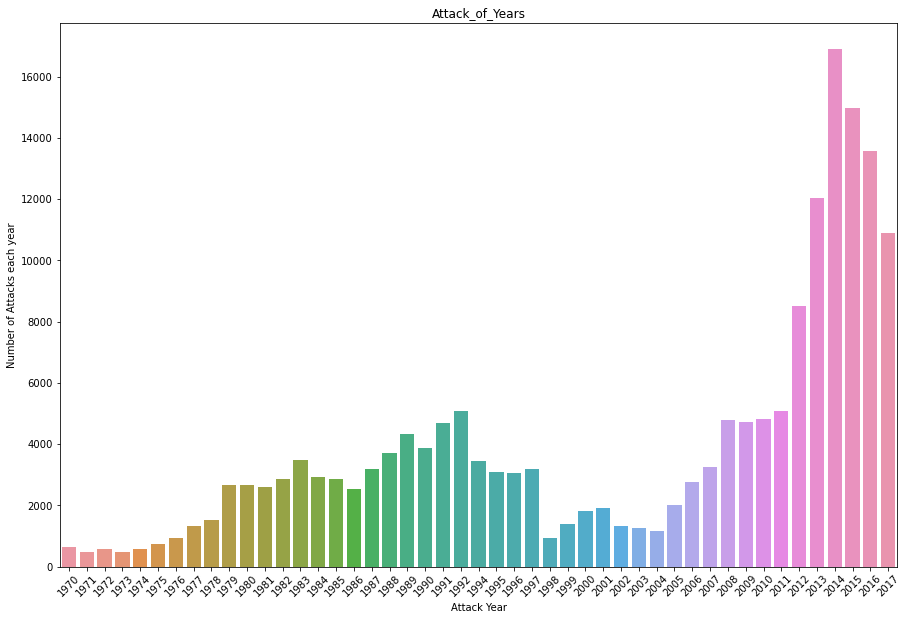

In [18]:
plt.figure(figsize = (15,10))
sns.barplot(x,y)
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

Year with most attacks = 2014

Year with least attacks = 1971

region vs year attack visualization

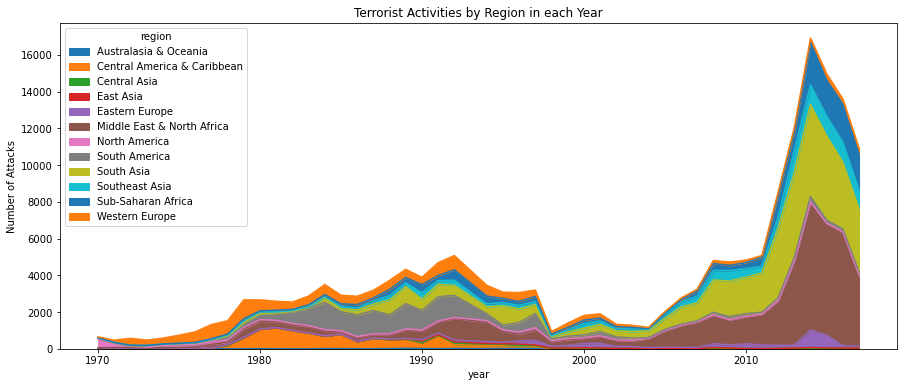

In [19]:
pd.crosstab(data.year, data.region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

Attacks vs region bar plot

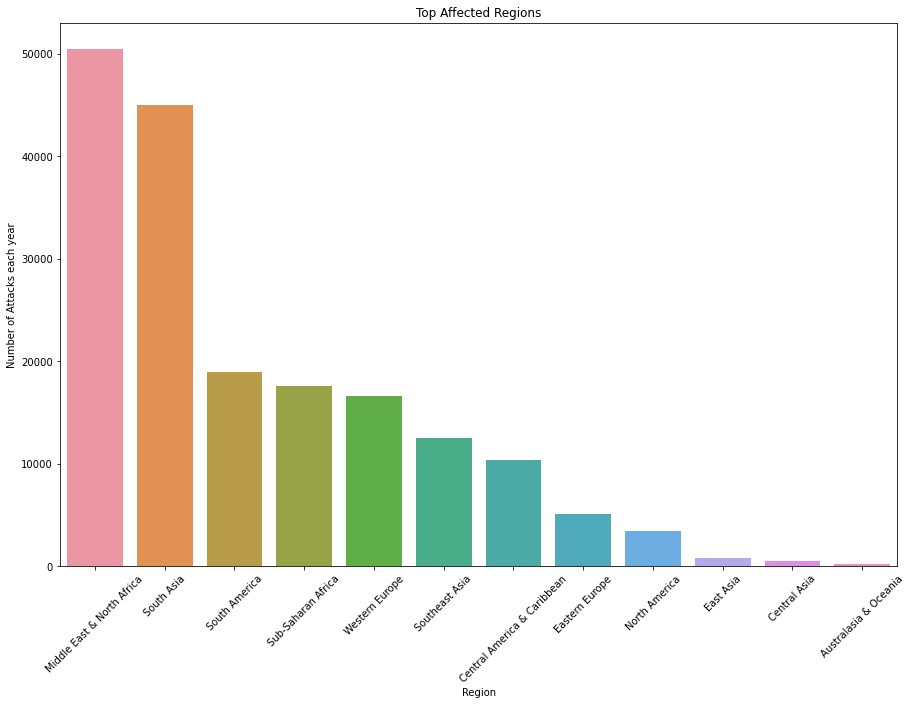

In [20]:
plt.figure(figsize = (15,10))
sns.barplot(data['region'].value_counts()[:15].index,data['region'].value_counts()[:15].values)
plt.xticks(rotation = 45)
plt.xlabel('Region')
plt.ylabel('Number of Attacks each year')
plt.title('Top Affected Regions')
plt.show()

Region with most attacks = Middle East & North Africa

Region with least attacks = Australasia & Oceania

In [21]:
data['country'].value_counts()[:15].index

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey', 'Somalia', 'Nigeria',
       'Thailand', 'Yemen', 'Spain'],
      dtype='object')

In [22]:
data['country'].value_counts()[:15].values

array([24636, 14368, 12731, 11960,  8306,  6908,  6096,  5320,  5235,
        4292,  4142,  3907,  3849,  3347,  3249], dtype=int64)

country vs number of attacks per year bar plot

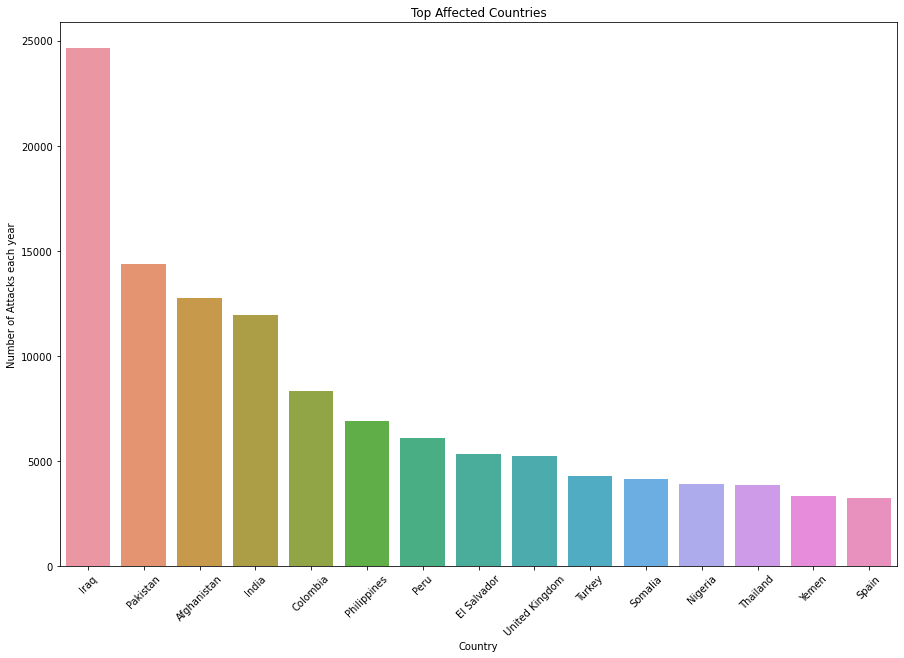

In [23]:
plt.figure(figsize = (15,10))
sns.barplot(data['country'].value_counts()[:15].index,data['country'].value_counts()[:15].values)
plt.xticks(rotation = 45)
plt.xlabel('Country')
plt.ylabel('Number of Attacks each year')
plt.title('Top Affected Countries')
plt.show()

Country with most attacks = Iraq

Country with least attacks = Spain

In [24]:
data['wounded'] = data['wounded'].fillna(0).astype(int)
data['killed'] = data['killed'].fillna(0).astype(int)
data['casuality'] = data['wounded'] + data['killed']

In [25]:
data['casuality']

0         1
1         0
2         1
3         0
4         0
         ..
181686    3
181687    9
181688    0
181689    0
181690    0
Name: casuality, Length: 181691, dtype: int32

In [26]:
data1 = data.sort_values(by = 'casuality' ,ascending = False)[:50]

In [27]:
data1

,year,month,day,country,region,state,city,location,attack_type,target_type,target,group,weapon_type,weapon_subtype,killed,wounded,casuality
73126,2001,9,11,United States,North America,New York,New York City,NaN,Hijacking,Private Citizens & Property,Passengers and crew members on American Airlin...,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,NaN,1384,8190,9574
73127,2001,9,11,United States,North America,New York,New York City,NaN,Hijacking,Private Citizens & Property,Passengers and crew members on United Airlines...,Al-Qaida,Vehicle (not to include vehicle-borne explosiv...,NaN,1383,8191,9574
58841,1995,3,20,Japan,East Asia,Tokyo,Tokyo,NaN,Unarmed Assault,Transportation,Subway system,Aum Shinri Kyo,Chemical,NaN,13,5500,5513
68071,1998,8,7,Kenya,Sub-Saharan Africa,Nairobi,Nairobi,NaN,Bombing/Explosion,Government (Diplomatic),"United States Embassy in Nairobi, Kenya",Al-Qaida,Explosives,Vehicle,224,4000,4224
133518,2014,6,12,Iraq,Middle East & North Africa,Saladin,Tikrit,NaN,Hostage Taking (Kidnapping),Military,Soldiers,Islamic State of Iraq and the Levant (ISIL),Firearms,Unknown Gun Type,1570,0,1570
159773,2016,3,9,Iraq,Middle East & North Africa,Kirkuk,Taza Khurmatu,NaN,Bombing/Explosion,Private Citizens & Property,Subdistrict,Islamic State of Iraq and the Levant (ISIL),Chemical,Explosive,3,1500,1503
61548,1996,1,31,Sri Lanka,South Asia,Western,Colombo,NaN,Bombing/Explosion,Business,Bank,Liberation Tigers of Tamil Eelam (LTTE),Explosives,Vehicle,90,1272,1362
55934,1994,4,13,Rwanda,Sub-Saharan Africa,Kigali,Gikoro,NaN,Armed Assault,Private Citizens & Property,Group of Tutsi Refugees inside Catholic Church,Hutu extremists,Firearms,Automatic or Semi-Automatic Rifle,1180,0,1180
85682,2008,2,2,Chad,Sub-Saharan Africa,N'Djamena,N'Djamena,Inside the city of N'Djamena,Armed Assault,Government (General),President Idriss Deby,Rebels,Firearms,Automatic or Semi-Automatic Rifle,160,1001,1161
76953,2004,9,1,Russia,Eastern Europe,North Ossetia-Alania (Republic),Beslan,NaN,Hostage Taking (Barricade Incident),Educational Institution,"School Number One (SNO) in Beslan, Russia",Riyadus-Salikhin Reconnaissance and Sabotage B...,Explosives,Suicide (carried bodily by human being),344,727,1071


casuality table 

In [28]:
casuality_table = data1.pivot_table(index = 'country',columns = 'year',values = 'casuality')
casuality_table.fillna(0,inplace = True)
casuality_table

year,1982,1984,1987,1992,1994,1995,1996,1997,1998,2001,...,2005,2006,2007,2008,2009,2013,2014,2015,2016,2017
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,536.0,0.000000,584.0
Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,1161.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Egypt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,438.0
Ethiopia,0.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,520.000000,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1005.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Iran,760.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0
Iraq,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,702.0,462.0,833.333333,0.0,509.0,0.0,1064.333333,0.0,911.666667,0.0


In [29]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=casuality_table.values, x=casuality_table.columns, y=casuality_table.index, colorscale=colorscale)
hm = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data = hm, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

In [30]:
killdata = data.loc[:,'killed']
killdata

0         1
1         0
2         1
3         0
4         0
         ..
181686    1
181687    2
181688    0
181689    0
181690    0
Name: killed, Length: 181691, dtype: int32

In [31]:
AttackType = data.loc[:,'attack_type']
AttackType

0                          Assassination
1            Hostage Taking (Kidnapping)
2                          Assassination
3                      Bombing/Explosion
4         Facility/Infrastructure Attack
                       ...              
181686                     Armed Assault
181687                 Bombing/Explosion
181688    Facility/Infrastructure Attack
181689                 Bombing/Explosion
181690                 Bombing/Explosion
Name: attack_type, Length: 181691, dtype: object

In [32]:
KillTypeData = pd.concat([AttackType, killdata], axis=1)

In [33]:
KillTypeData

,attack_type,killed
0,Assassination,1
1,Hostage Taking (Kidnapping),0
2,Assassination,1
3,Bombing/Explosion,0
4,Facility/Infrastructure Attack,0
...,...,...
181686,Armed Assault,1
181687,Bombing/Explosion,2
181688,Facility/Infrastructure Attack,0
181689,Bombing/Explosion,0


In [34]:
killtype = KillTypeData.pivot_table(columns='attack_type', values='killed', aggfunc='sum')
killtype

attack_type,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
killed,160297,24920,157321,3642,3718,4478,24231,880,32381


In [35]:
killtype.value_counts()

Armed Assault  Assassination  Bombing/Explosion  Facility/Infrastructure Attack  Hijacking  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  Unarmed Assault  Unknown
160297         24920          157321             3642                            3718       4478                                 24231                        880              32381      1
dtype: int64

Pi Chart of attack types

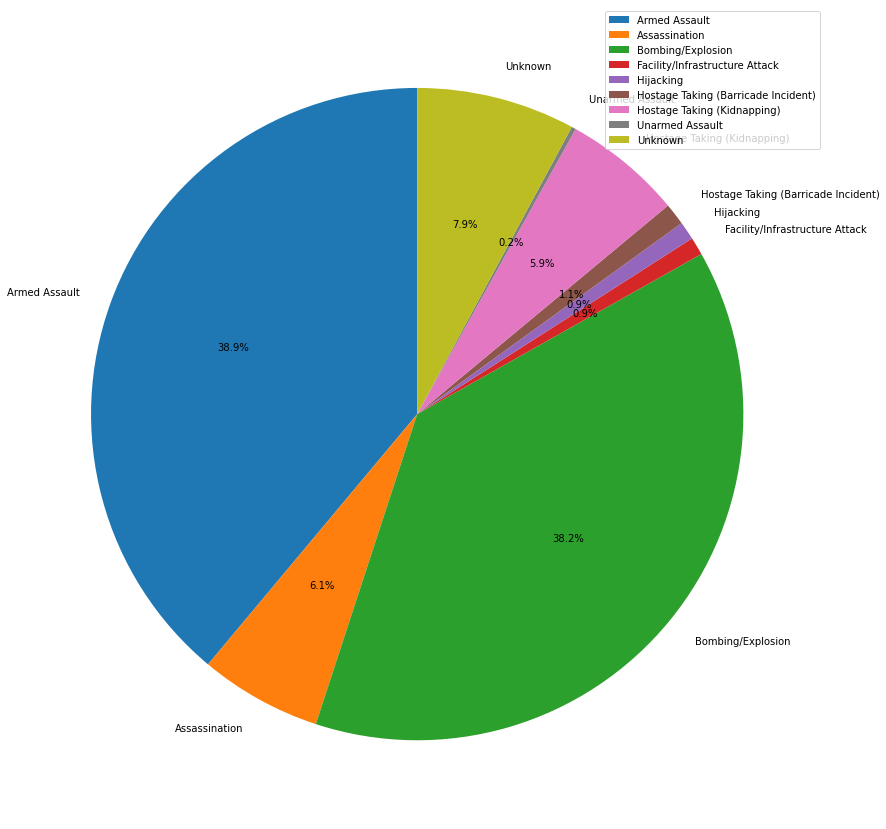

In [36]:
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw=dict(aspect="equal"))
label = ["Armed Assault","Assassination","Bombing/Explosion","Facility/Infrastructure Attack","Hijacking","Hostage Taking (Barricade Incident)","Hostage Taking (Kidnapping)","Unarmed Assault","Unknown"]
y = np.array([160297,24920,157321,3642,3718,4478,24231,880,32381])
plt.pie(y,labels=label, startangle=90, autopct='%1.1f%%')
plt.legend()
plt.show() 

most used attack type = Armed Assault (38.9%)

least used atack type = Unarmed Assault(0.2%)

In [37]:
countrydata = data.loc[:,'country']
countrydata

0         Dominican Republic
1                     Mexico
2                Philippines
3                     Greece
4                      Japan
                 ...        
181686               Somalia
181687                 Syria
181688           Philippines
181689                 India
181690           Philippines
Name: country, Length: 181691, dtype: object

In [38]:
killdata = data.loc[:,'killed']
killdata

0         1
1         0
2         1
3         0
4         0
         ..
181686    1
181687    2
181688    0
181689    0
181690    0
Name: killed, Length: 181691, dtype: int32

In [39]:
countrykill = pd.concat([countrydata, killdata], axis=1)
countrykill

,country,killed
0,Dominican Republic,1
1,Mexico,0
2,Philippines,1
3,Greece,0
4,Japan,0
...,...,...
181686,Somalia,1
181687,Syria,2
181688,Philippines,0
181689,India,0


In [40]:
CountryKill = countrykill.pivot_table(columns = 'country', values = 'killed', aggfunc='sum')
CountryKill

country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Vietnam,Wallis and Futuna,West Bank and Gaza Strip,West Germany (FRG),Western Sahara,Yemen,Yugoslavia,Zaire,Zambia,Zimbabwe
killed,39384,42,11066,0,3043,0,490,37,23,30,...,1,0,1500,97,1,8776,119,324,70,154


In [41]:
labels1 = CountryKill.columns.tolist()
labels1

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia-Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Germany (GDR)',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guadeloupe',
 'G

In [42]:
l1 = labels1[:50]
l1

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia-Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Czechoslovakia',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Germany (GDR)',
 'East Timor']

In [43]:
x1 = np.arange(len(l1))
x1

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [44]:
transpoze = CountryKill.T
transpoze

,killed
country,
Afghanistan,39384
Albania,42
Algeria,11066
Andorra,0
Angola,3043
...,...
Yemen,8776
Yugoslavia,119
Zaire,324


In [45]:
y1 = transpoze.values.tolist()
y1 = y1[:50]
y1
y1 = [int(i[0]) for i in y1]
y1

[39384,
 42,
 11066,
 0,
 3043,
 0,
 490,
 37,
 23,
 30,
 258,
 1,
 44,
 1244,
 76,
 14,
 79,
 3,
 0,
 9,
 42,
 79,
 11,
 203,
 0,
 28,
 134,
 4205,
 543,
 2347,
 365,
 1990,
 1119,
 228,
 1008,
 14698,
 1,
 17,
 248,
 8,
 45,
 6,
 27,
 4069,
 5,
 274,
 3,
 34,
 2,
 9]

country vs kills bar plot

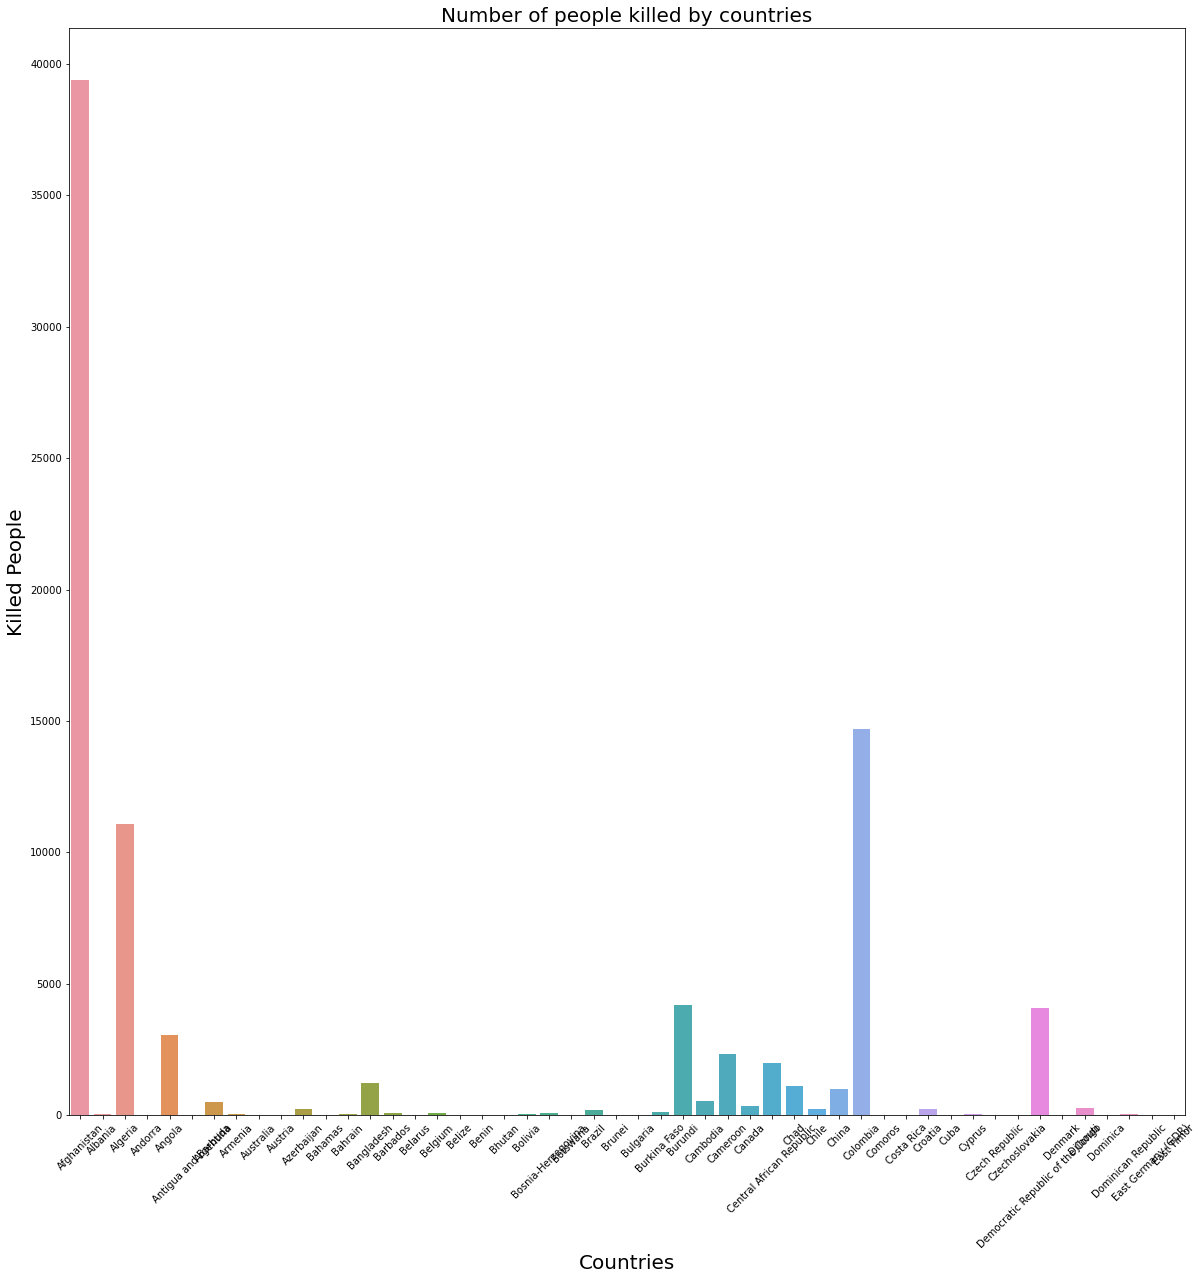

In [46]:
plt.figure(figsize = (20,20))
sns.barplot(l1,y1)
plt.xticks(rotation = 45)
plt.xlabel('Country')
plt.ylabel('Number of Attacks each year')
plt.title('Top Affected Countries')
plt.ylabel('Killed People', fontsize=20)
plt.xlabel('Countries', fontsize = 20)
plt.title('Number of people killed by countries', fontsize = 20)
plt.show()